In [8]:
#Importar bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5445 - accuracy: 0.4353 - val_loss: 1.2508 - val_accuracy: 0.5521
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1491 - accuracy: 0.5924 - val_loss: 1.1629 - val_accuracy: 0.5881
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9897 - accuracy: 0.6534 - val_loss: 0.9755 - val_accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8958 - accuracy: 0.6866 - val_loss: 0.9667 - val_accuracy: 0.6623
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8240 - accuracy: 0.7112 - val_loss: 0.8855 - val_accuracy: 0.6931
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7638 - accuracy: 0.7317 - val_loss: 0.8754 - val_accuracy: 0.6946
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7202 - accuracy: 0.7490 - val_loss: 0.8605 -

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylin'

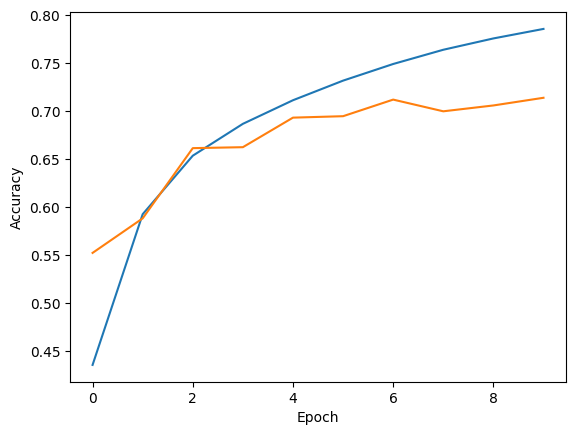

In [11]:
#Cargar y preprocesar el conjunto de datos cifar-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

#Construir la arquitectura de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])

#Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

#Visualizar los resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylin([0,1])
plt.legend(loc='lower right')
plt.show()